# Kieran Molloy UCDPA Project 
### Course CIDAB 2022-01-18
***

### Environment Information
<table align="left">
<tr>
    <th>Environment Type</th>
    <th>Anaconda Version</th>
    <th>Anaconda Build Channel</th>
    <th>Python Version</th>
</tr>
<tr>
    <td>Anaconda </td>
    <td>2021.11 </td>
    <td>py39_0 </td>
    <td>3.9.7 </td>
</tr>
</table>

## Links to Kaggle Datasource: 
***

#### _[Transactional Retail Dataset of Electronics Store](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store)_

*  _[dirty_data.csv](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store?select=dirty_data.csv)_
*  _[missing_data.csv](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store?select=missing_data.csv)_
*  _[warehouses.csv](https://www.kaggle.com/datasets/muhammadshahrayar/transactional-retail-dataset-of-electronics-store?select=warehouses.csv)_


# Setup

<div class="alert alert-block alert-info"><b></b>installing an importing modules ,setting variables and functions </div>

## Install Modules

In [ ]:
#commented out installers prevent re-run, uncomment if required 
#%pip install geopy
#%pip install plotly

## Import Modules
***

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import display 

import pandas as pd
import numpy as np
import seaborn as sns
# import itertools
import time
from datetime import datetime


from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import plotly.express as px 

## Set Variables
***

In [ ]:
# set all csv variables
dirty_data = 'dirty_data.csv'
missing_data = 'missing_data.csv'
warehouse_data = 'warehouses.csv'
customer_addresses = 'customer_addresses.csv' 
warehouse_addresses = 'warehouse_addresses.csv'

In [180]:
# pd.set_option('display.max_columns' , 200 )
# pd.set_option('display.max_columns' , 200 )

<Figure size 864x432 with 0 Axes>

## Functions
***

In [ ]:
def get_missing_nearest_warehouse(lat , Long ):
    ''' use coordinates to find the closest warehouse (crow flies) using geodesic API'''
    
    # customer coordinates are provided
    coords_customer = lat, Long
    
    # get warehouse latitude and longitide from warehouse table
    coords_Nickolson = df_warehouse_data['lat'].loc[df_warehouse_data.index[0]], df_warehouse_data['lon'].loc[df_warehouse_data.index[0]]
    coords_Thompson = df_warehouse_data['lat'].loc[df_warehouse_data.index[1]], df_warehouse_data['lon'].loc[df_warehouse_data.index[1]]
    coords_Bakers = df_warehouse_data['lat'].loc[df_warehouse_data.index[2]], df_warehouse_data['lon'].loc[df_warehouse_data.index[2]]
    
    # use geodesic to do a km distance comparison
    Nickolson_cust_dist = geodesic(coords_customer, coords_Nickolson).km
    Thompson_cust_dist = geodesic(coords_customer, coords_Thompson).km
    Bakers_cust_dist = geodesic(coords_customer, coords_Bakers).km
    
    val = (Nickolson_cust_dist ,Thompson_cust_dist ,Bakers_cust_dist)
    
    # get the min value distance value
    min_dist = val.index(min(val))
    
     # convert min_dist to warehouse name and distance in km
    if min_dist == 0:
        warehouse = 'Nickolson'
        distance = Nickolson_cust_dist
        return(warehouse , distance)
    elif min_dist == 1:
        warehouse = 'Thompson'
        distance = Nickolson_cust_dist
        return(warehouse , distance)
    else: 
        warehouse = 'Bakers'
        distance = Nickolson_cust_dist
        return(str(warehouse) , distance)
        # test values : get_missing_nearest_warehouse(-37.815105 ,144.932843)

In [ ]:
def get_missing_order_price(order_total, delivery_charges, coupon_discount):
    ''' calculate order_price from order_total, delivery_charges and coupon_discount '''
    order_price = (order_total - delivery_charges) / (100-coupon_discount) * 100
    return(round(order_price, 2))
    # test : get_missing_order_price(11059.89 ,79.89 ,10 )

In [ ]:
def get_missing_order_total(order_price, delivery_charges, coupon_discount):
    ''' calculate order_total from order_price, delivery_charges and coupon_discount'''
    order_total = order_price - (order_price / 100 * coupon_discount) + delivery_charges
    return(round(order_total, 2))
    # test values : get_missing_order_total(11059.89 ,79.89 ,10 )

In [ ]:
def get_missing_season(date):
    '''calculate season from date'''
    # Spring = months 9,10,11
    # summer = months 12,1,2
    # Autumn = months 3,4,5
    # Winter = months 6,7,8

    month = date.month

    if month in [9,10,11]:
        season = 'Spring'
    elif month in [12,1,2]:
        season = 'Summer'
    elif month in [3,4,5]:
        season = 'Autumn'
    else:
        season = 'Winter'
    
    return(season)
    # test values : get_missing_season(datetime(2019, 6, 22))

In [ ]:
def get_geo_address(customer_id, lat, long):
    '''use  Nominatim API to get address data from customer_lat and customer_long'''
    
    # simple multiply by -1   
    geolocator = Nominatim(user_agent="app")
    
    # simple multiply by -1   
    coordinates =  str(lat) + " " + str(long)

    # select the required address 
    location = geolocator.reverse(coordinates,timeout=None)
    address = location.raw['address']
    road = address.get('road', '')
    suburb = address.get('suburb', '')
    city = address.get('city', '')
    postcode = address.get('postcode', '')
    state = address.get('state', '')
    country = address.get('country', '')
    
    return(customer_id, road, suburb, city, postcode, state, country)
    # test values : get_geo_address('ID6231506320' ,-37.8117454 ,144.9564037)

In [ ]:
def convert_to_negative(val):
    '''get the negative of a passed value'''
    
    # simple multiply by -1     
    negative_val = val * (-1)
    
    return negative_val
    # test values : convert_to_negative(37.8117454)

# CSV Import and review 
***

<div class="alert alert-block alert-info"><b></b><strong>DataFrames df_dirty_data</strong> , <strong>df_missing_data</strong>, <strong>df_warehouse_data</strong> , <strong>df_customer_addresses</strong> and <strong>df_warehouse_addresses</strong> are created , imported from relevent CSV<br>Datatype changes are made on import where possible, some indexes set and columns selected</div>

In [ ]:
# read the CSV from the local Jupyter Notebook directory 
# parsing dates on import since dates were objects also change datatype on order_price
df_dirty_data = pd.read_csv(dirty_data, parse_dates=['date'], dtype={'order_price': 'float'}) 
df_missing_data = pd.read_csv(missing_data, parse_dates=['date']) 
df_warehouse_data = pd.read_csv(warehouse_data)
df_customer_addresses = pd.read_csv(customer_addresses, dtype={'postcode': 'int'} ,usecols=['customer_id','road','suburb','city','postcode','state','country'],index_col='customer_id') #this csv is created for this assignment in Section 7
df_warehouse_addresses = pd.read_csv(warehouse_addresses, dtype={'postcode': 'int'} ,usecols=['warehouse','road','suburb','city','postcode','state','country'], index_col='warehouse')  #this csv is created for this assignment in Section 8

In [ ]:
df_warehouse_addresses

## Data Review
***

### df_dirty_data dataframe review

In [ ]:
type(df_dirty_data)

In [ ]:
print(df_dirty_data.columns)

In [ ]:
# will use display command for better tabular formatting in jupyter Notebook
display(df_dirty_data.head(10))

In [ ]:
# will use display command for better tabular formatting in jupyter Notebook
display(df_dirty_data.describe())

In [ ]:
print(df_dirty_data.info())

In [ ]:
print(df_dirty_data.shape)

In [ ]:
print(df_dirty_data.isna().any())

In [ ]:
print(df_dirty_data.isna().sum())

### df_missing_data dataframe review

In [ ]:
type(df_missing_data)

In [ ]:
print(df_missing_data.columns)

In [ ]:
display(df_missing_data.head(10))

In [ ]:
display(df_missing_data.describe())

In [ ]:
print(df_missing_data.info())

In [ ]:
print(df_missing_data.shape)

In [ ]:
print(df_missing_data.isna().any())

In [ ]:
print(df_missing_data.isna().sum())

### df_warehouse_data dataframe review

In [ ]:
type(df_warehouse_data)

In [ ]:
print(df_warehouse_data.columns)

In [ ]:
type(df_warehouse_data)

In [ ]:
display(df_warehouse_data.head())

In [ ]:
display(df_warehouse_data.describe())

In [ ]:
print(df_warehouse_data.info())

In [ ]:
print(df_warehouse_data.shape)

In [ ]:
print(df_warehouse_data.isna().any())

In [ ]:
print(df_warehouse_data.isna().sum())

### df_customer_addresses dataframe review

[This DataFrame is created in Section 7](#df_customer_addresses)

In [ ]:
type(df_customer_addresses)

In [ ]:
print(df_customer_addresses.columns)

In [ ]:
type(df_customer_addresses)

In [ ]:
display(df_customer_addresses.head())

In [ ]:
display(df_customer_addresses.describe())

In [ ]:
print(df_customer_addresses.info())

In [ ]:
print(df_customer_addresses.shape)

In [ ]:
print(df_customer_addresses.isna().any())

In [ ]:
print(df_customer_addresses.isna().sum())

### df_warehouse_addresses dataframe review

[This DataFrame is created in Section 8](#df_warehouse_addresses)

In [ ]:
type(df_warehouse_addresses)

In [ ]:
print(df_warehouse_addresses.columns)

In [ ]:
type(df_warehouse_addresses)

In [ ]:
display(df_warehouse_addresses.head())

In [ ]:
display(df_warehouse_addresses.describe())

In [ ]:
print(df_warehouse_addresses.info())

In [ ]:
print(df_warehouse_addresses.shape)

In [ ]:
print(df_warehouse_addresses.isna().any())

In [ ]:
print(df_warehouse_addresses.isna().sum())

## Create Indexes

In [ ]:
# check for orderid uniqueness in df_dirty_data
duplicate_dirty_data = df_dirty_data[df_dirty_data.duplicated(['order_id'])]
print(duplicate_dirty_data)

In [ ]:
# check for orderid uniqueness in df_missing_data 
duplicate_missing_data = df_missing_data[df_missing_data.duplicated(['order_id'])]
print(duplicate_missing_data)

In [ ]:
# create an order_id index on df_dirty_data
df_dirty_data.set_index('order_id',inplace=True)

In [ ]:
# create an order_id index on df_missing_data
df_missing_data.set_index('order_id',inplace=True)

In [ ]:
print(df_dirty_data.index)

In [ ]:
print(df_missing_data.index)

# Detect and fix errors in df_dirty_data DataFrame
***

<div class="alert alert-block alert-info"><b></b>Fixing anomolous data issues with <strong>df_dirty_data</strong> DataFrame</div>

In [ ]:
# show missing values - none found
print(df_dirty_data.isna().sum())

In [ ]:
print(df_dirty_data.info())

In [ ]:
display(df_dirty_data.head())

In [ ]:
columns = df_dirty_data.columns
print(len(columns))

### Rename 'nearest_warehouse' values

In [ ]:
# getting the unique values for 'nearest_warehouse'
nearest_warehouse = df_dirty_data['nearest_warehouse'].sort_values().unique()
print(nearest_warehouse)

In [ ]:
df_dirty_data['nearest_warehouse'] = df_dirty_data['nearest_warehouse'].str.title()

### Rename 'season' values

In [ ]:
# getting the unique values for 'season'
season = df_dirty_data['season'].sort_values().unique()
print(season)

In [ ]:
df_dirty_data['season'] = df_dirty_data['season'].str.title()

### Check 'order_price' and 'order_total' some values dont seem correct

In [ ]:
arr = df_dirty_data['order_price']

print("Q2 quantile of order_price : ", np.quantile(arr, .50))
print("Q1 quantile of order_price : ", np.quantile(arr, .25))
print("Q3 quantile of order_price : ", np.quantile(arr, .75))
print("100th quantile of order_price : ", np.quantile(arr, .1))

In [ ]:
arr = df_dirty_data['order_total']

print("Q2 quantile of order_total : ", np.quantile(arr, .50))
print("Q1 quantile of order_total : ", np.quantile(arr, .25))
print("Q3 quantile of order_total : ", np.quantile(arr, .75))
print("100th quantile of order_total : ", np.quantile(arr, .1))

#### visually comparing 'shopping_cart'  'order_price'  'delivery_charges'  'coupon_discount'  'order_total' 

In [ ]:
# sorted by 'order_total','order_price'
df_dirty_data[['shopping_cart','order_price','delivery_charges','coupon_discount','order_total']].sort_values(ascending = False, by=['order_total','order_price']).head(10)

In [ ]:
# sorted by 'order_price','order_total'
df_dirty_data[['shopping_cart','order_price','delivery_charges','coupon_discount','order_total']].sort_values(ascending = False, by=['order_price','order_total']).head(10)

In [ ]:
# sorted by 'order_price','shopping_cart' perhaps anomolies are from items purchased 
df_dirty_data[['shopping_cart','order_price','delivery_charges','coupon_discount','order_total']].sort_values(ascending = False, by=['order_price','shopping_cart']).head(10)

In [ ]:
pd.set_option('display.max_colwidth', 100)
df_dirty_data[['shopping_cart','order_price','delivery_charges','coupon_discount','order_total']].sort_values(ascending = True, by=['order_price']).head(40)

In [ ]:
pd.set_option('max_colwidth', 100)
df_shopping_cart = df_dirty_data[['shopping_cart','order_price']]

# df_shopping_cart_filter = df_shopping_cart[lambda row : row['shopping_cart'].str.contains('Thunder line.*Lucent 330S' ,regex=True)]
df_shopping_cart_filter = df_shopping_cart[lambda row : row['shopping_cart'].str.contains('Thunder line.*Lucent 330S|Lucent 330S.*Thunder line' ,regex=True)].head(40)

df_shopping_cart_filter.sort_values('shopping_cart')
# unique items 'Thunder line' ,'Lucent 330S' ,'Alcon 10', 'Universe Note', 'Olivia x460', 'Candle Inferno', 'iAssist Line', 'iStream', 'Toshika 750', 'pearTV'

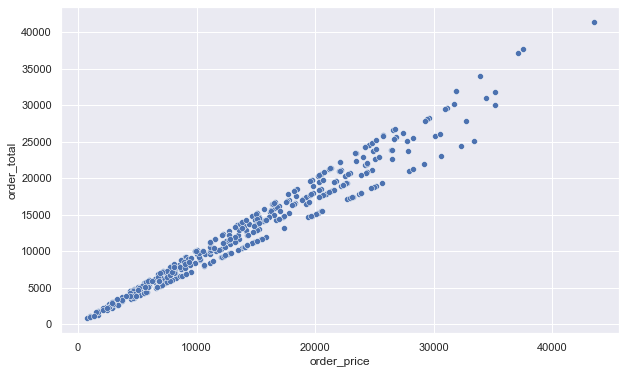

In [187]:
# if we look at order_price versus order_total 
sns.scatterplot(data=df_dirty_data,y='order_total', x='order_price');

In [ ]:
# Minimum and maximum order_price versus order_total 
print('Minimum order_price ' + str(df_dirty_data['order_price'].min()));
print('Minimum order_total ' + str(df_dirty_data['order_total'].min()));
print('Maximum order_price ' + str(df_dirty_data['order_price'].max()));
print('Maximum order_total ' + str(df_dirty_data['order_total'].max()));

#### calculating the actual order_total that dont add up from 'order_price' 'delivery_charges' 'coupon_discount' , listing those order_ids 

In [ ]:
# lets find where (order_price - coupon_discount + delivery_charges != order_total) dont add up 
# we can use function get_missing_order_total to get order_id where they dont match 
# add incorrect rows to new dataframe df_incorrect_order_total

df_incorrect_order_total = pd.DataFrame()

for i, row in df_dirty_data.iterrows():
    if df_dirty_data.at[i, 'order_total'] != get_missing_order_total(df_dirty_data.at[i,'order_price'],df_dirty_data.at[i,'delivery_charges'],df_dirty_data.at[i,'coupon_discount']):
        df_incorrect_order_total = df_incorrect_order_total.append({'order_id':i,   
                'order_price':df_dirty_data.at[i,'order_price'],                                 
                'delivery_charges':df_dirty_data.at[i,'delivery_charges'],
                'coupon_discount':df_dirty_data.at[i,'coupon_discount'], 
                'order_total':df_dirty_data.at[i,'order_total']
               },ignore_index=True)

In [ ]:
display(df_incorrect_order_total.sort_values('order_total', ascending=False))

#### calculating the actual order_price that dont add up from 'order_total' 'delivery_charges' 'coupon_discount' , listing those order_ids

In [ ]:
# lets find where (order_total - delivery_charges / coupon_discount != order_price) dont add up
# we can use function get_missing_order_price to get order_id where they dont match
# add incorrect rows dataframe df_incorrect_order_price

df_incorrect_order_price = pd.DataFrame()

for i, row in df_dirty_data.iterrows():
    if df_dirty_data.at[i,'order_price'] != get_missing_order_price(df_dirty_data.at[i,'order_total'],df_dirty_data.at[i,'delivery_charges'],df_dirty_data.at[i,'coupon_discount']):
        df_incorrect_order_price = df_incorrect_order_price.append({'order_id':i,                                               
                'order_price':df_dirty_data.at[i,'order_price'],                                 
                'delivery_charges':df_dirty_data.at[i,'delivery_charges'],
                'coupon_discount':df_dirty_data.at[i,'coupon_discount'], 
                'order_total':df_dirty_data.at[i,'order_total']
               },ignore_index=True)

In [ ]:
display(df_incorrect_order_price.sort_values('order_total', ascending=False))

In [ ]:
# we can conclude that 40 orders have incorrect calculations for either order_price or order_total,they will be removed 
# it makes sense that df_incorrect_order_price and df_incorrect_order_total contain the same rows 
df_incorrect_order_id = df_incorrect_order_price['order_id'] = df_incorrect_order_total['order_id']
print(df_incorrect_order_id.count())

In [ ]:
# list of order_id's that are incorrect
list_incorrect_order_id = df_incorrect_order_id.tolist()
print(list_incorrect_order_id)

### remove list_incorrect_order_id from df_dirty_data 

In [ ]:
# use the list created above 'list_incorrect_order_id' to remove orders that have incorrect order_price and order_total's 
print(df_dirty_data.drop(df_dirty_data[df_dirty_data.index.isin(list_incorrect_order_id)].index,inplace=True))

In [ ]:
df_dirty_data

### Check Latitude and Longitude, some values seem incorrect , some latitude values are negative some are not

#### Check Latitude and Longitude in df_dirty_data

In [ ]:
max_long = df_dirty_data['customer_long'].max();
min_long = df_dirty_data['customer_long'].min()
max_lat = df_dirty_data['customer_lat'].max();
min_lat = df_dirty_data['customer_lat'].min()
print('max_longitude:',max_long)
print('max_latitude:',max_lat)
print('min_longitude:',min_long)
print('min_latitude:',min_lat)

In [ ]:
# getting index where 'customer_lat' is positive
positive_customer_lat_indexto_update = df_dirty_data[df_dirty_data['customer_lat'] > 0 ].index
print(positive_customer_lat_indexto_update)

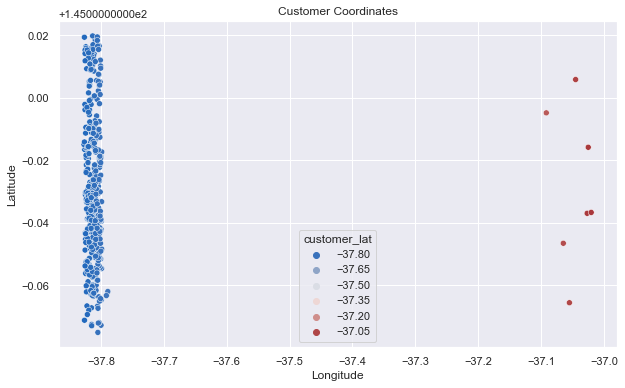

In [186]:
#  using a scatterplot to visualise discrepancies in Latitude and Longitude in the df_dirty_data DataFrame
#  the scatterplot shows there are some positive latitude values , we'll map these to see where they are
plt.figure(figsize = (10,6))
sns.set_theme(style="darkgrid");

ax = sns.scatterplot(x='customer_lat', y='customer_long' ,data=df_dirty_data, hue='customer_lat', palette = 'vlag')
plt.title('Customer Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()  

In [ ]:
# map shows coordinates are in the Melbourne area and off the Japanese coast , unless Captain Nemo ordered some supplies im assuming this to be incorrect
# zoom on the map for closer inspection
fig = px.scatter_mapbox(df_dirty_data, lat="customer_lat", lon="customer_long",color_discrete_sequence=["DarkRed"], zoom=2, height=600, center=dict(lat=-4, lon=160), size='customer_long')
fig.update_layout(mapbox_style='open-street-map',margin={'r':500,'t':0,'l':0,'b':0})
fig.show()

In [ ]:
# df_dirty_data.describe shows the max value
display(df_dirty_data.describe()[['customer_lat']])
# min and percentiles are in the -37 decimal range with the exception of the max 37, I suggest these latitudes should be negative, will change and observe the difference 
# if making the values negative re-positions to Melbourne it is probably ok

In [ ]:
# list all rows where 'customer_lat' is positive
positive_customer_lat_to_update = df_dirty_data[df_dirty_data['customer_lat'] > 0 ]
display(positive_customer_lat_to_update[['customer_lat']])

In [ ]:
# getting index where 'customer_lat' is positive
positive_customer_lat_indexto_update = df_dirty_data[df_dirty_data['customer_lat'] > 0 ].index
print(positive_customer_lat_indexto_update)

In [ ]:
# updating missing values for 'nearest_warehouse'
for i, row in positive_customer_lat_to_update.iterrows():
    df_dirty_data.at[i,'customer_lat'] = convert_to_negative(df_dirty_data.at[i,'customer_lat'])

In [ ]:
# list all rows where 'customer_lat' is positive : all fixed
positive_customer_lat_to_update = df_dirty_data[df_dirty_data['customer_lat'] > 0 ]
display(positive_customer_lat_to_update)

In [ ]:
#check the indexes for the updated 'customer_lat' --  all done
display(df_dirty_data[['customer_lat']].loc[positive_customer_lat_indexto_update])

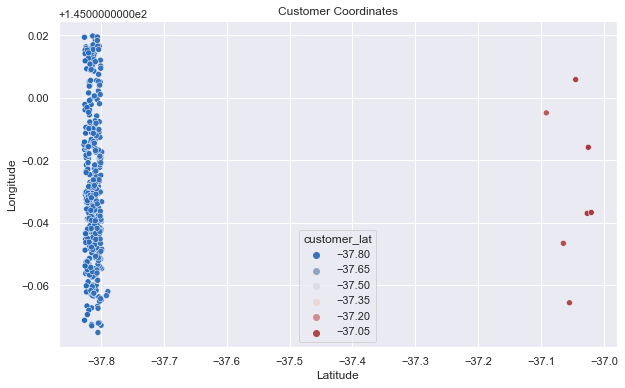

In [184]:
# using a scatterplot to visualise updated in Latitude and Longitude in the df_dirty_data DataFrame
# all values are negative and all within -37
plt.figure(figsize = (10,6))
sns.set_theme(style="darkgrid");

sns.scatterplot(x='customer_lat', y='customer_long' ,data=df_dirty_data, hue='customer_lat', palette = 'vlag')
plt.title('Customer Coordinates')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [179]:
# check the updated coordinates are in the Melbourne area , all seem to be good, all located downtown Melbourne and north of Melbourne
# zoom on the map for closer inspection
fig = px.scatter_mapbox(df_dirty_data, lat="customer_lat", lon='customer_long',color_discrete_sequence=['DarkRed'],center=dict(lat=-37.5, lon=145), zoom=7)
fig.update_layout(mapbox_style='open-street-map',margin={'r':500,'t':0,'l':0,'b':0})
fig.show()

#### Check Latitude and Longitude in df_missing_data

In [ ]:
max_long = df_missing_data['customer_long'].max();
min_long = df_missing_data['customer_long'].min()
max_lat = df_missing_data['customer_lat'].max();
min_lat = df_missing_data['customer_lat'].min()
print('max_longitude:',max_long)
print('max_latitude:',max_lat)
print('min_longitude:',min_long)
print('min_latitude:',min_lat)

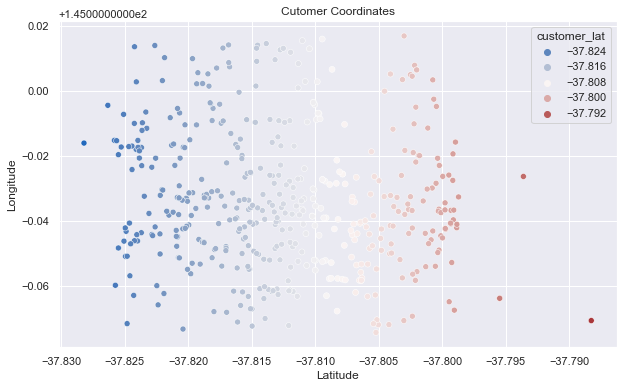

In [185]:
# here we can see the scatterplot contains an even distribution for negative latitude values in the df_missing_data DataFrame
# all -37
plt.figure(figsize = (10,6))
sns.set_theme(style="darkgrid");

sns.scatterplot(x='customer_lat', y='customer_long',data=df_missing_data,  hue='customer_lat', palette = 'vlag')
plt.title('Cutomer Coordinates',)
# Set x-axis label
plt.xlabel('Latitude')
# Set y-axis label
plt.ylabel('Longitude')
plt.show()

In [ ]:
# map shows all coordinates are in the Melbourne area in df_missing_data nothing seems out of order
# zoom on the map for closer inspection
fig = px.scatter_mapbox(df_missing_data, lat='customer_lat', lon='customer_long',color_discrete_sequence=['DarkRed'], zoom=11)
fig.update_layout(mapbox_style='open-street-map',margin={'r':500,'t':0,'l':0,'b':0})
fig.show()

# Detect and Fix missing values in df_missing_data DataFrame
***

<div class="alert alert-block alert-info"><b></b>Fixing missing data issues with <strong>df_missing_data</strong> DataFrame<br><strong>Not fixing missing data in customer_lat or customer_long or is_happy_customer</strong></div>

In [ ]:
# show missing values
print(df_missing_data.isna().sum())

### Fix missing 'nearest_warehouse' values

In [ ]:
# getting rows for the missing values for 'nearest_warehouse'
nearest_warehouse_to_update = df_missing_data[df_missing_data['nearest_warehouse'].isna()]

display(nearest_warehouse_to_update[['nearest_warehouse']])

In [ ]:
# getting index for the the missing values for 'nearest_warehouse'
nearest_warehouse_indexto_update = df_missing_data[df_missing_data['nearest_warehouse'].isna()].index
print(nearest_warehouse_indexto_update)

In [ ]:
# updating missing values for 'nearest_warehouse'
for i, row in nearest_warehouse_to_update.iterrows():
    df_missing_data.at[i,'nearest_warehouse'] = get_missing_nearest_warehouse(df_missing_data.at[i,'customer_lat'],df_missing_data.at[i,'customer_long'])[0]

In [ ]:
# no more missing values for 'nearest_warehouse'
print(df_missing_data[df_missing_data['nearest_warehouse'].isna()])

In [ ]:
#check the indexes for the update 'nearest_warehouse' --  all done
display(df_missing_data[['nearest_warehouse']].loc[nearest_warehouse_indexto_update])

### Fix missing 'order_price' values

In [ ]:
# getting rows for the missing values for 'order_price'
order_price_to_update = df_missing_data[df_missing_data['order_price'].isna()]

display(order_price_to_update[['order_price']])

In [ ]:
# getting index for the the missing values for 'order_price'
order_price_indexto_update = df_missing_data[df_missing_data['order_price'].isna()].index
print(order_price_indexto_update)

In [ ]:
# updating missing values for 'order_price'
for i, row in order_price_to_update.iterrows():
    df_missing_data.at[i,'order_price'] = get_missing_order_price(df_missing_data.at[i,'order_total'],df_missing_data.at[i,'delivery_charges'],df_missing_data.at[i,'coupon_discount'])

In [ ]:
# no more missing values for 'order_price'
print(df_missing_data[df_missing_data['order_price'].isna()])

In [ ]:
#check the indexes for the update 'order_price' --  all done
display(df_missing_data[['order_price']].loc[order_price_indexto_update])

### Fix missing 'order_total' values

In [ ]:
# getting rows for the missing values for 'order_total'
order_total_to_update = df_missing_data[df_missing_data['order_total'].isna()]

display(order_total_to_update[['order_total']])

In [ ]:
# getting index for the the missing values for 'order_total'
order_total_indexto_update = df_missing_data[df_missing_data['order_total'].isna()].index
print(order_total_indexto_update)

In [ ]:
# updating missing values for 'order_total'
for i, row in order_total_to_update.iterrows():
    df_missing_data.at[i,'order_total'] = get_missing_order_total(df_missing_data.at[i,'order_price'],df_missing_data.at[i,'delivery_charges'],df_missing_data.at[i,'coupon_discount'])

In [ ]:
# no more missing values for 'order_total'
print(df_missing_data[df_missing_data['order_total'].isna()])

In [ ]:
#check the indexes for the update 'order_total' --  all done
display(df_missing_data[['order_total']].loc[order_total_indexto_update])

### Fix missing 'season' values

In [118]:
# getting rows for the missing values for 'season'
season_to_update = df_missing_data[df_missing_data['season'].isna()]

display(season_to_update[['season']])

,season
order_id,
ORD279446,NaN
ORD083901,NaN
ORD250242,NaN
ORD078069,NaN
ORD016552,NaN
ORD429692,NaN
ORD434639,NaN
ORD032506,NaN
ORD027479,NaN


In [119]:
# getting index for the the missing values for 'order_total'
season_indexto_update = df_missing_data[df_missing_data['season'].isna()].index
print(season_indexto_update)

Index(['ORD279446', 'ORD083901', 'ORD250242', 'ORD078069', 'ORD016552',
       'ORD429692', 'ORD434639', 'ORD032506', 'ORD027479', 'ORD437147'],
      dtype='object', name='order_id')


In [120]:
# getting the unique values for 'season'
seasons = df_missing_data['season'].sort_values().unique()
print(seasons)

['Autumn' 'Spring' 'Summer' 'Winter' nan]


In [121]:
# get the season months from the grouping of the orders..obviously Southern hemisphere - a random lat long shows its Melbourne, Australia area
season_months = df_missing_data.groupby([pd.Grouper(key='date', axis=0, freq='M'),'season']).sum().filter(items=['date','season'])
display(season_months)
# summer = months 12,1,2
# Autumn = months 3,4,5
# Winter = months 6,7,8
# Spring = months 9,10,11

,
date,season
2019-01-31,Summer
2019-02-28,Summer
2019-03-31,Autumn
2019-04-30,Autumn
2019-05-31,Autumn
2019-06-30,Winter
2019-07-31,Winter
2019-08-31,Winter
2019-09-30,Spring


In [190]:
# updating missing values for 'season'
for i, row in df_missing_data.iterrows():
    df_missing_data.at[i,'season'] = get_missing_season(df_missing_data.at[i,'date'])

In [189]:
# no more missing values for 'season'
print(df_missing_data[df_missing_data['season'].isna()])

Empty DataFrame
Columns: [customer_id, date, nearest_warehouse, shopping_cart, order_price, delivery_charges, customer_lat, customer_long, coupon_discount, order_total, season, is_expedited_delivery, distance_to_nearest_warehouse, latest_customer_review, is_happy_customer]
Index: []


In [191]:
#check the indexes for the update 'season' --  all done
display(df_missing_data[['season']].loc[order_total_indexto_update])

,season
order_id,
ORD177154,Winter
ORD467869,Spring
ORD386228,Spring
ORD323368,Spring
ORD481503,Summer
ORD355999,Summer
ORD246570,Spring
ORD109486,Autumn
ORD354308,Summer


### Fix missing 'distance_to_nearest_warehouse' values

In [127]:
# getting rows for the missing values for 'distance_to_nearest_warehouse'
distance_to_nearest_warehouse_to_update = df_missing_data[df_missing_data['distance_to_nearest_warehouse'].isna()]

display(distance_to_nearest_warehouse_to_update[['distance_to_nearest_warehouse']])

,distance_to_nearest_warehouse
order_id,
ORD265586,NaN
ORD224296,NaN
ORD247311,NaN
ORD465260,NaN
ORD160120,NaN
ORD174660,NaN
ORD048679,NaN
ORD392649,NaN
ORD137128,NaN


In [128]:
# getting index for the the missing values for 'distance_to_nearest_warehouse'
distance_to_nearest_warehouse_indexto_update = df_missing_data[df_missing_data['distance_to_nearest_warehouse'].isna()].index
print(distance_to_nearest_warehouse_indexto_update)

Index(['ORD265586', 'ORD224296', 'ORD247311', 'ORD465260', 'ORD160120',
       'ORD174660', 'ORD048679', 'ORD392649', 'ORD137128', 'ORD132417'],
      dtype='object', name='order_id')


In [129]:
# updating missing values for 'distance_to_nearest_warehouse'
for i, row in distance_to_nearest_warehouse_to_update.iterrows():
    df_missing_data.at[i,'distance_to_nearest_warehouse'] = get_missing_nearest_warehouse(df_missing_data.at[i,'customer_lat'],df_missing_data.at[i,'customer_long'])[1]

In [130]:
# no more missing values for 'distance_to_nearest_warehouse'
print(df_missing_data[df_missing_data['distance_to_nearest_warehouse'].isna()])

Empty DataFrame
Columns: [customer_id, date, nearest_warehouse, shopping_cart, order_price, delivery_charges, customer_lat, customer_long, coupon_discount, order_total, season, is_expedited_delivery, distance_to_nearest_warehouse, latest_customer_review, is_happy_customer]
Index: []


In [131]:
#check the indexes for the update 'season' --  all done
display(df_missing_data[['distance_to_nearest_warehouse']].loc[order_total_indexto_update])

,distance_to_nearest_warehouse
order_id,
ORD177154,1.1751
ORD467869,1.5693
ORD386228,1.5685
ORD323368,1.5645
ORD481503,1.5146
ORD355999,0.8535
ORD246570,0.5281
ORD109486,1.6033
ORD354308,0.7148


### Fix missing 'customer_lat' values - not progressing with this: out of scope for this assignment

In [132]:
# show missing 'customer_lat' rows
customer_lat_to_update = df_missing_data[df_missing_data['customer_lat'].isna()]
display(customer_lat_to_update[['customer_lat']])

,customer_lat
order_id,
ORD006145,NaN
ORD225147,NaN
ORD387776,NaN
ORD008298,NaN
ORD417492,NaN
ORD296102,NaN
ORD452316,NaN
ORD285564,NaN
ORD297989,NaN


In [133]:
# getting the index for the missing values for customer_lat
customer_lat_indexto_update = df_missing_data[df_missing_data['customer_lat'].isna()].index
customer_lat_indexto_update

Index(['ORD006145', 'ORD225147', 'ORD387776', 'ORD008298', 'ORD417492',
       'ORD296102', 'ORD452316', 'ORD285564', 'ORD297989', 'ORD157248'],
      dtype='object', name='order_id')

### Fix missing 'customer_long' values - not progressing with this: out of scope for this assignment

In [134]:
# show missing 'customer_long' rows
customer_lat_to_update = df_missing_data[df_missing_data['customer_long'].isna()]
display(customer_lat_to_update[['customer_long']])

,customer_long
order_id,
ORD131598,NaN
ORD287765,NaN
ORD159527,NaN
ORD052599,NaN
ORD015960,NaN
ORD466918,NaN
ORD125582,NaN
ORD305340,NaN
ORD166029,NaN


In [135]:
# getting the index for the missing values for customer_long
customer_long_indexto_update = df_missing_data[df_missing_data['customer_long'].isna()].index
customer_long_indexto_update

Index(['ORD131598', 'ORD287765', 'ORD159527', 'ORD052599', 'ORD015960',
       'ORD466918', 'ORD125582', 'ORD305340', 'ORD166029', 'ORD487171'],
      dtype='object', name='order_id')

In [136]:
# show missing values
print(df_missing_data.isna().sum())

customer_id                       0
date                              0
nearest_warehouse                 0
shopping_cart                     0
order_price                       0
delivery_charges                  0
customer_lat                     10
customer_long                    10
coupon_discount                   0
order_total                       0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse     0
latest_customer_review            0
is_happy_customer                10
dtype: int64


### Fix missing 'is_happy_customer' values - not progressing with this: out of scope for this assignment

* would need sentiment analysis against the latest_customer_review column

# Append cleaned Dataframes df_dirty_data and df_missing_data
***

<div class="alert alert-block alert-info"><b></b>Work is complete on correcting issues with <strong>df_missing_data</strong> and <strong>df_dirty_data</strong> they are appended here to create <strong>df_order_data</strong><br> NaN are filtered from 'customer_lat', 'customer_long' and 'is_happy_customer'</div>

In [137]:
df_missing_data.shape

(500, 15)

In [138]:
df_missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, ORD382112 to ORD414852
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    500 non-null    object        
 1   date                           500 non-null    datetime64[ns]
 2   nearest_warehouse              500 non-null    object        
 3   shopping_cart                  500 non-null    object        
 4   order_price                    500 non-null    float64       
 5   delivery_charges               500 non-null    float64       
 6   customer_lat                   490 non-null    float64       
 7   customer_long                  490 non-null    float64       
 8   coupon_discount                500 non-null    int64         
 9   order_total                    500 non-null    float64       
 10  season                         500 non-null    object        
 11  is_expedit

In [139]:
df_missing_data.index

Index(['ORD382112', 'ORD378488', 'ORD279446', 'ORD277196', 'ORD116193',
       'ORD005004', 'ORD296379', 'ORD447851', 'ORD078449', 'ORD018258',
       ...
       'ORD273851', 'ORD329425', 'ORD277938', 'ORD297371', 'ORD218866',
       'ORD289820', 'ORD425999', 'ORD252675', 'ORD215989', 'ORD414852'],
      dtype='object', name='order_id', length=500)

In [140]:
df_dirty_data.shape

(460, 15)

In [141]:
df_dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, ORD182494 to ORD085447
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    460 non-null    object        
 1   date                           460 non-null    datetime64[ns]
 2   nearest_warehouse              460 non-null    object        
 3   shopping_cart                  460 non-null    object        
 4   order_price                    460 non-null    float64       
 5   delivery_charges               460 non-null    float64       
 6   customer_lat                   460 non-null    float64       
 7   customer_long                  460 non-null    float64       
 8   coupon_discount                460 non-null    int64         
 9   order_total                    460 non-null    float64       
 10  season                         460 non-null    object        
 11  is_expedit

In [142]:
df_dirty_data.index

Index(['ORD182494', 'ORD395518', 'ORD494479', 'ORD019224', 'ORD104032',
       'ORD146760', 'ORD337984', 'ORD377837', 'ORD462194', 'ORD034800',
       ...
       'ORD161955', 'ORD182549', 'ORD435271', 'ORD082002', 'ORD034351',
       'ORD379700', 'ORD086060', 'ORD079320', 'ORD026546', 'ORD085447'],
      dtype='object', name='order_id', length=460)

In [143]:
# remove NaN for 'customer_lat', 'customer_long' and 'is_happy_customer' from df_missing_data
df_missing_data_NoNa = df_missing_data[(df_missing_data['customer_lat'].notna()) & (df_missing_data['customer_long'].notna()) & (df_missing_data['is_happy_customer'].notna())]
df_missing_data_NoNa

,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
order_id,,,,,,,,,,,,,,,
ORD382112,ID0289597187,2019-03-06,Thompson,"[('pearTV', 1), ('Candle Inferno', 2)]",7170.0,61.72,-37.811782,144.951972,15,6156.22,Autumn,True,0.4425,"to many adds in ui it has adds, sends info to manufacture,",False
ORD378488,ID1668523020,2019-05-05,Thompson,"[('Thunder line', 1), ('Lucent 330S', 2), ('Alcon 10', 1)]",13590.0,65.20,-37.808236,144.942181,10,12296.20,Autumn,False,0.6547,s10e haven't had this phone but a short time but i have fallen in love lol,True
ORD279446,ID0370751503,2019-03-24,Bakers,"[('Candle Inferno', 2), ('Universe Note', 1)]",4310.0,78.75,-37.812941,144.985883,15,3742.25,Autumn,True,0.8852,"best bang for your buck! great overall android phone, no damages during shipping and after a mon...",True
ORD277196,ID0634774947,2019-01-12,Thompson,"[('pearTV', 1), ('Thunder line', 1), ('Olivia x460', 2)]",10940.0,92.59,-37.811748,144.938192,25,8297.59,Summer,True,0.7875,good it was a gift for my niece. it to her in jamaica.,True
ORD116193,ID3313210924,2019-09-02,Nickolson,"[('pearTV', 2), ('Universe Note', 2), ('Thunder line', 1)]",21700.0,95.62,-37.818393,144.967034,5,20710.62,Spring,True,0.2225,"excellent product excellent product, was received as described, was delivered at the correct time.",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ORD289820,ID0711745634,2019-06-24,Thompson,"[('Toshika 750', 1), ('Lucent 330S', 2), ('Candle Inferno', 1), ('Universe Note', 1)]",10660.0,46.20,-37.815309,144.945919,15,9107.20,Winter,False,0.3104,batería dañada hola. la batería se dañó. donde puedo solicitar su reemplazo o reparación?,False
ORD425999,ID3208518274,2019-02-12,Nickolson,"[('pearTV', 2), ('Olivia x460', 1), ('iAssist Line', 1), ('Universe Note', 2)]",22970.0,83.03,-37.802503,144.967428,15,19607.53,Summer,False,1.8010,great phone for the money. the price was right. it works well and the battery easily lasts 2 days.,True
ORD252675,ID0589449505,2019-09-14,Nickolson,"[('Alcon 10', 2), ('Thunder line', 2), ('Universe Note', 1), ('Toshika 750', 2)]",34350.0,78.57,-37.809446,144.972736,15,29276.07,Spring,False,1.0563,"four stars very good olivia universe s5 , i would rate 4 stars",True


In [144]:
display(df_missing_data_NoNa.info())

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, ORD382112 to ORD414852
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    470 non-null    object        
 1   date                           470 non-null    datetime64[ns]
 2   nearest_warehouse              470 non-null    object        
 3   shopping_cart                  470 non-null    object        
 4   order_price                    470 non-null    float64       
 5   delivery_charges               470 non-null    float64       
 6   customer_lat                   470 non-null    float64       
 7   customer_long                  470 non-null    float64       
 8   coupon_discount                470 non-null    int64         
 9   order_total                    470 non-null    float64       
 10  season                         470 non-null    object        
 11  is_expedit

None

In [145]:
# remove NaN for 'customer_lat', 'customer_long' and 'is_happy_customer' from  df_dirty_data
df_dirty_data_NoNa = df_dirty_data[(df_dirty_data['customer_lat'].notna()) & (df_dirty_data['customer_long'].notna()) & (df_dirty_data['is_happy_customer'].notna())]
df_dirty_data_NoNa

,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
order_id,,,,,,,,,,,,,,,
ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iStream', 2), ('pearTV', 1)]",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself is amazing. i got this phone as shown here on the...,True
ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,"it keeps dropping calls the wifi don't work this is a waste of money this phone is worthless, it...",False
ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Olivia x460', 1), ('iAssist Line', 1)]",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('iStream', 1), ('Toshika 750', 1)]",9145.0,75.54,-37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ORD379700,ID2190564628,2019-08-05,Nickolson,"[('Candle Inferno', 1), ('Alcon 10', 1), ('Lucent 330S', 1), ('Universe Note', 2)]",17510.0,75.37,-37.816209,144.964057,5,16709.87,Winter,True,0.5513,"good quality price ratio bought it for my mom, she uses, she loves, yay! i am done.",True
ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshika 750', 2)]",22120.0,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S', 1)]",16490.0,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True


In [146]:
display(df_dirty_data_NoNa.info())

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, ORD182494 to ORD085447
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    460 non-null    object        
 1   date                           460 non-null    datetime64[ns]
 2   nearest_warehouse              460 non-null    object        
 3   shopping_cart                  460 non-null    object        
 4   order_price                    460 non-null    float64       
 5   delivery_charges               460 non-null    float64       
 6   customer_lat                   460 non-null    float64       
 7   customer_long                  460 non-null    float64       
 8   coupon_discount                460 non-null    int64         
 9   order_total                    460 non-null    float64       
 10  season                         460 non-null    object        
 11  is_expedit

None

In [147]:
# create a new dataframe from df_dirty_data_NoNa and df_missing_data_NoNa 
df_order_data = df_dirty_data_NoNa.append(df_missing_data_NoNa, ignore_index=False)
# df_order_data = pd.concat([df_missing_data_NoNa, df_dirty_data_NoNa ], ignore_index=False)

In [148]:
df_order_data = df_order_data.reset_index()

In [149]:
display(df_order_data)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iStream', 2), ('pearTV', 1)]",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself is amazing. i got this phone as shown here on the...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,"it keeps dropping calls the wifi don't work this is a waste of money this phone is worthless, it...",False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Olivia x460', 1), ('iAssist Line', 1)]",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('iStream', 1), ('Toshika 750', 1)]",9145.0,75.54,-37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,ORD289820,ID0711745634,2019-06-24,Thompson,"[('Toshika 750', 1), ('Lucent 330S', 2), ('Candle Inferno', 1), ('Universe Note', 1)]",10660.0,46.20,-37.815309,144.945919,15,9107.20,Winter,False,0.3104,batería dañada hola. la batería se dañó. donde puedo solicitar su reemplazo o reparación?,False
926,ORD425999,ID3208518274,2019-02-12,Nickolson,"[('pearTV', 2), ('Olivia x460', 1), ('iAssist Line', 1), ('Universe Note', 2)]",22970.0,83.03,-37.802503,144.967428,15,19607.53,Summer,False,1.8010,great phone for the money. the price was right. it works well and the battery easily lasts 2 days.,True
927,ORD252675,ID0589449505,2019-09-14,Nickolson,"[('Alcon 10', 2), ('Thunder line', 2), ('Universe Note', 1), ('Toshika 750', 2)]",34350.0,78.57,-37.809446,144.972736,15,29276.07,Spring,False,1.0563,"four stars very good olivia universe s5 , i would rate 4 stars",True
928,ORD215989,ID6167357842,2019-09-16,Nickolson,"[('Candle Inferno', 2), ('Olivia x460', 1), ('Lucent 330S', 2), ('Thunder line', 1)]",6725.0,105.14,-37.807649,144.971370,15,5821.39,Spring,True,1.2289,great purchase!!! my twins love them!!,True


<a id="df_customer_addresses"></a>

# Create new df_customer_addresses DataFrame and export to CSV
***

<div class="alert alert-block alert-info"><b></b><strong>df_customer_addresses</strong> is created here from <strong>df_order_data</strong>.<br><strong>df_customer_addresses</strong> contains addresses for customers by making an Nominatum API call using the <strong>get_geo_address</strong> function<br><strong>df_customer_addresses</strong> is exported to <strong>customer_addresses.csv</strong> for re-use</div>

In [150]:
# getting 'customer_lat' and 'customer_long'] for df_order_data
customerid_lat_long = df_order_data[['customer_id','customer_lat','customer_long']]

display(customerid_lat_long.head(10))

,customer_id,customer_lat,customer_long
0,ID6197211592,-37.815105,144.932843
1,ID0282825849,-37.802736,144.951118
2,ID0579391891,-37.821302,144.957581
3,ID4544561904,-37.811416,144.973073
4,ID6231506320,-37.823859,144.969892
5,ID0311654900,-37.820245,145.014944
6,ID3394768956,-37.807743,144.951570
7,ID4769265355,-37.810810,145.014073
8,ID5301568579,-37.808675,144.942337
9,ID4283908179,-37.811334,145.008678


In [151]:
# get address for each customer and create a new Dataframe called df_customer_addresses
# create_df_customer_addresses = 0 so it doesnt run if 'All Cells are Run'
# Change create_df_customer_addresses = 1 to create the df_customer_addresses Dataframe , estimated time 970 records @ 1 second each ~ 17mins.. more like 30mins

create_df_customer_addresses = 0

if create_df_customer_addresses == 1:
    print('Creating df_customer_addresses Dataframe')
    df_customer_addresses = pd.DataFrame()
    x=1
    for i, row in customerid_lat_long.iterrows():
            #print to screen to get completion estimate from x     
            print(row[0],row[1],row[2])
            x+=1
            #add 1 second delay from Nominatum rate limiting         
            time.sleep(1)
            # pass values to the get_geo_address function          
            df_customer_addresses = df_customer_addresses.append({'customer_id':get_geo_address(row[0],row[1],row[2])[0], 
                        'road':get_geo_address(row[0],row[1],row[2])[1],
                        'suburb':get_geo_address(row[0],row[1],row[2])[2],
                        'city':get_geo_address(row[0],row[1],row[2])[3],
                        'postcode':get_geo_address(row[0],row[1],row[2])[4],                                 
                        'state':get_geo_address(row[0],row[1],row[2])[5], 
                        'country':get_geo_address(row[0],row[1],row[2])[6]
                       },ignore_index=True)
else:
    print('Dataframe df_warehouse_addresses not required')


Dataframe df_warehouse_addresses not required


In [152]:
duplicate = df_customer_addresses[df_customer_addresses.duplicated()] 
duplicate

,road,suburb,city,postcode,state,country
customer_id,,,,,,
ID3218293544,Queensberry Street,North Melbourne,Melbourne,3051,Victoria,Australia
ID0253027653,Main Yarra Trail Capital City Trail,Burnley,Melbourne,3121,Victoria,Australia
ID0589704716,Flinders Street,Melbourne,Melbourne,3000,Victoria,Australia
ID0277362770,Victoria Street,Abbotsford,Melbourne,3067,Victoria,Australia
ID2473002367,Main Yarra Trail Capital City Trail,Abbotsford,Melbourne,3067,Victoria,Australia
...,...,...,...,...,...,...
ID3215192035,Roden Street,West Melbourne,Melbourne,3003,Victoria,Australia
ID0711745634,Marvel Stadium External Concourse (Level 1),Docklands,Melbourne,3008,Victoria,Australia
ID3208518274,Lygon Street,Carlton,Melbourne,3053,Victoria,Australia


In [153]:
# we can safely drop duplicates , should be only one address per customer but duplicates may have occured because of multiple orders per customer
df_customer_addresses.drop_duplicates(inplace=True)

In [154]:
df_customer_addresses

,road,suburb,city,postcode,state,country
customer_id,,,,,,
ID6197211592,CityLink,Docklands,Melbourne,3008,Victoria,Australia
ID0282825849,Queensberry Street,North Melbourne,Melbourne,3051,Victoria,Australia
ID0579391891,Rebecca Walk,Melbourne,Melbourne,3000,Victoria,Australia
ID4544561904,Bourke Street,East Melbourne,Melbourne,3000,Victoria,Australia
ID6231506320,Musicians lane,Southbank,Melbourne,3006,Victoria,Australia
...,...,...,...,...,...,...
ID6024224415,Buckley Walk,Docklands,Melbourne,3008,Victoria,Australia
ID0245537608,Constance Stone Lane,Melbourne,Melbourne,3000,Victoria,Australia
ID0250933641,Duke Street,Richmond,Melbourne,3121,Victoria,Australia


In [155]:
# output df_customer_addresses created in previous step to csv in local notebook path
if create_df_customer_addresses == 1:
    df_customer_addresses.to_csv(r'customer_addresses.csv')

<a id="df_warehouse_addresses"></a>

# Create new df_warehouse_addresses DataFrame and export to CSV
***

<div class="alert alert-block alert-info"><b></b><strong>df_warehouse_addresses</strong> is created here from <strong>df_warehouses</strong>.<br><strong>df_warehouse_addresses</strong> contains addresses for warehouses by making an Nominatum API call using the <strong>get_geo_address</strong> function<br><strong>df_warehouse_addresses</strong> is exported to <strong>warehouse_addresses.csv</strong> for re-use</div>

In [156]:
# getting '_lat' and 'customer_long'] for df_order_data
warehouse_lat_long = df_warehouse_data[['names','lat','lon']]

display(warehouse_lat_long)

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


 Change create_df_customer_addresses = 1 to create the df_customer_addresses Dataframe , estimated time 970 records @ 1 second each ~ 17mins.. more like 30mins



In [157]:
# get address for each customer and create a new Dataframe called df_customer_addresses
create_df_warehouse_addresses = 0

if create_df_warehouse_addresses == 1:
    print('Creating df_warehouse_addresses Dataframe')
    df_warehouse_addresses = pd.DataFrame()
    x=1
    for i, row in warehouse_lat_long.iterrows():
            #print to screen to get completion estimate from x     
            print(x,row[0],row[1],row[2])
            x+=1
            #add 1 second delay from Nominatum rate limiting         
            time.sleep(1)
            # pass values to the get_geo_address function          
            df_warehouse_addresses = df_warehouse_addresses.append({'warehouse':get_geo_address(row[0],row[1],row[2])[0],
                        'road':get_geo_address(row[0],row[1],row[2])[1],
                        'suburb':get_geo_address(row[0],row[1],row[2])[2],
                        'city':get_geo_address(row[0],row[1],row[2])[3],
                        'postcode':get_geo_address(row[0],row[1],row[2])[4],                                 
                        'state':get_geo_address(row[0],row[1],row[2])[5], 
                        'country':get_geo_address(row[0],row[1],row[2])[6]
                       },ignore_index=True)
else:
    print('Dataframe df_warehouse_addresses not required')


Dataframe df_warehouse_addresses not required


In [158]:
# output df_customer_addresses created in previous step to csv in local notebook path
if create_df_warehouse_addresses == 1:
    df_warehouse_addresses.to_csv(r'warehouse_addresses.csv')

In [159]:
display(df_warehouse_addresses)

,road,suburb,city,postcode,state,country
warehouse,,,,,,
Nickolson,Princes Walk,Melbourne,Melbourne,3000,Victoria,Australia
Thompson,Dudley Street,Docklands,Melbourne,3008,Victoria,Australia
Bakers,Victoria Street,Abbotsford,Melbourne,3067,Victoria,Australia


## Merge df_order_data , df_customer_addresses and df_warehouse_addresses
***

In [160]:
# data in df_order_data is cleanso we can merge with df_customer_addresses and df_warehouse_addresses
df_order_data_full = df_order_data.merge(df_customer_addresses , on=['customer_id'])\
.merge(df_warehouse_addresses ,left_on='nearest_warehouse' ,right_on='warehouse' ,suffixes=('_cust','_warehouse'))

In [213]:
display(df_order_data_full[['is_happy_customer']])

,is_happy_customer
0,True
1,True
2,False
3,True
4,False
...,...
420,True
421,True
422,True
423,False


In [203]:
display(df_order_data_full.columns)

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer', 'road_cust', 'suburb_cust', 'city_cust',
       'postcode_cust', 'state_cust', 'country_cust', 'road_warehouse',
       'suburb_warehouse', 'city_warehouse', 'postcode_warehouse',
       'state_warehouse', 'country_warehouse'],
      dtype='object')

# Visualisations
***

<div class="alert alert-block alert-info"><b></b>Create Visualations for Analysis</div>

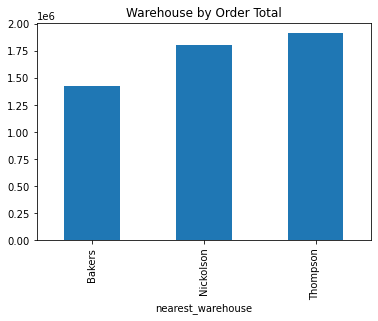

In [162]:
# Get the total number of avocados sold of each size
nb_sold_by_size = df_order_data_full.groupby(['nearest_warehouse'])['order_total'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind = "bar", title='Warehouse by Order Total')

# Show the plot
plt.show()

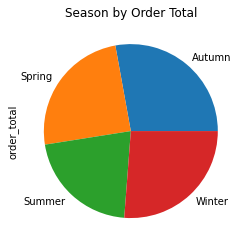

In [163]:
# Get the total number of avocados sold of each size
nb_sold_by_size = df_order_data_full.groupby(['season'])['order_total'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind = "pie", title='Season by Order Total')

# Show the plot
plt.show()

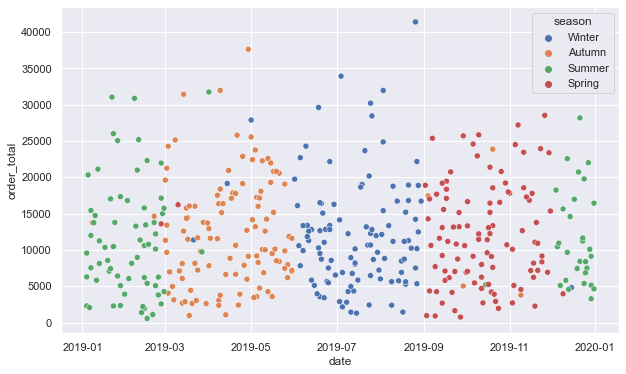

In [175]:
sns.scatterplot(data=df_order_data_full, x='date', y='order_total',hue='season')
plt.show()

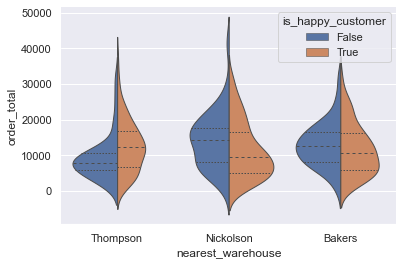

In [239]:

sns.set_theme(style="darkgrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df_order_data_full, x="nearest_warehouse", y="order_total", hue="is_happy_customer",
               split=True, inner="quart", linewidth=1)
               # palette={"True": "b", "False": ".85"})
sns.despine(left=True)

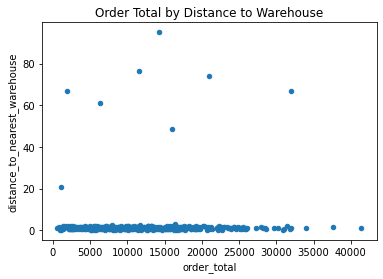

In [166]:
# Scatter plot of nb_sold vs avg_price with title
df_order_data_full.plot(x="order_total",y="distance_to_nearest_warehouse",kind = "scatter",title = "Order Total by Distance to Warehouse")

# Show the plot
plt.show()